In [26]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import re

weather = pandas.read_excel('Baltimore_Weather_Data_3_Yr_Pnds_Adjst.xlsx')
df1 = pandas.read_csv('Calls_for_Disorderly.csv')
df2 = pandas.read_csv('Calls_for_Common_Assault.csv')
df3 = pandas.read_csv('Calls_for_Family_Disturb.csv')
df4 = pandas.read_csv('Calls_for_Behavioral_Crisis.csv')
from datetime import datetime

crime  = pandas.concat([df1,df2,df3,df4])

In [2]:
#Let's start by trying to eliminate some incomplete data (We can actually save some usable data by commenting this out)
crime.dropna(subset = ['location'])

,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,08/27/2015 12:31:00 PM,Medium,NE,DISORDERLY,P152391302,5000 LODESTONE WY,"5000 LODESTONE WY\nBALTIMORE, MD\n(39.321174, ..."
1,08/27/2015 12:43:00 PM,Medium,ND,DISORDERLY,P152391337,5100 YORK RD,"5100 YORK RD\nBALTIMORE, MD\n(39.350595, -76.6..."
2,08/27/2015 11:09:00 PM,Medium,SE,DISORDERLY,P152393662,2600 JEFFERSON ST,"2600 JEFFERSON ST\nBALTIMORE, MD\n(39.296826, ..."
3,09/01/2015 06:36:00 AM,Medium,ED,DISORDERLY,P152440510,1700 E OLIVER ST,"1700 E OLIVER ST\nBALTIMORE, MD\n(39.307481, -..."
4,07/16/2016 05:14:00 AM,Medium,CD,DISORDERLY,P161980556,1800 BLK N CALVERT ST,"1800 BLK N CALVERT ST\nBALTIMORE, MD\n(39.3100..."
6,08/27/2015 08:26:00 PM,Medium,NE,DISORDERLY,P152393030,1400 WALKER AV,"1400 WALKER AV\nBALTIMORE, MD\n(39.370561, -76..."
7,08/27/2015 11:10:00 PM,Medium,CD,DISORDERLY,P152393666,1500 PENNSYLVANIA AV,"1500 PENNSYLVANIA AV\nBALTIMORE, MD\n(39.30192..."
8,08/27/2015 12:32:00 PM,Medium,CD,DISORDERLY,P152391311,NB I 100 N AT W NORTH AV,"100 N AT W NORTH AV\nBALTIMORE, MD\n(39.311132..."
11,09/01/2015 12:26:00 AM,Medium,NW,DISORDERLY,P152440059,5500 HADDON AV,"5500 HADDON AV\nBALTIMORE, MD\n(39.337473, -76..."
12,08/27/2015 10:47:00 AM,Medium,CD,DISORDERLY,P152391003,200 N HOWARD ST,"200 N HOWARD ST\nBALTIMORE, MD\n(39.292176, -7..."


In [3]:
#Lets start preprocessing by stripping the lon-lat tags from the location and throwing them into their own field
#if any incomplete data exits it should be easily identifiable  in this field as a zero
trueLoc = []
for locs in crime['location']:
    if type(locs) == str:
        coords = (re.findall(r'[+-]?[0-9.]+', locs))
        if len(coords) >= 2:
            trueLoc.append( [float(coords[-2]), float(coords[-1])])
        else:
            trueLoc.append(0)
    else:
        trueLoc.append(0)
        
crime['Coordinates'] = trueLoc

In [4]:
#Now we jsut drop all rows where we can find those zeroes
crime[(crime != 0).all(1)]

,callDateTime,priority,district,description,callNumber,incidentLocation,location,Coordinates
0,08/27/2015 12:31:00 PM,Medium,NE,DISORDERLY,P152391302,5000 LODESTONE WY,"5000 LODESTONE WY\nBALTIMORE, MD\n(39.321174, ...","[39.321174, -76.555046]"
1,08/27/2015 12:43:00 PM,Medium,ND,DISORDERLY,P152391337,5100 YORK RD,"5100 YORK RD\nBALTIMORE, MD\n(39.350595, -76.6...","[39.350595, -76.609722]"
2,08/27/2015 11:09:00 PM,Medium,SE,DISORDERLY,P152393662,2600 JEFFERSON ST,"2600 JEFFERSON ST\nBALTIMORE, MD\n(39.296826, ...","[39.296826, -76.58032]"
3,09/01/2015 06:36:00 AM,Medium,ED,DISORDERLY,P152440510,1700 E OLIVER ST,"1700 E OLIVER ST\nBALTIMORE, MD\n(39.307481, -...","[39.307481, -76.594228]"
4,07/16/2016 05:14:00 AM,Medium,CD,DISORDERLY,P161980556,1800 BLK N CALVERT ST,"1800 BLK N CALVERT ST\nBALTIMORE, MD\n(39.3100...","[39.310009, -76.613727]"
6,08/27/2015 08:26:00 PM,Medium,NE,DISORDERLY,P152393030,1400 WALKER AV,"1400 WALKER AV\nBALTIMORE, MD\n(39.370561, -76...","[39.370561, -76.585971]"
7,08/27/2015 11:10:00 PM,Medium,CD,DISORDERLY,P152393666,1500 PENNSYLVANIA AV,"1500 PENNSYLVANIA AV\nBALTIMORE, MD\n(39.30192...","[39.301922, -76.632707]"
8,08/27/2015 12:32:00 PM,Medium,CD,DISORDERLY,P152391311,NB I 100 N AT W NORTH AV,"100 N AT W NORTH AV\nBALTIMORE, MD\n(39.311132...","[39.311132, -76.618077]"
11,09/01/2015 12:26:00 AM,Medium,NW,DISORDERLY,P152440059,5500 HADDON AV,"5500 HADDON AV\nBALTIMORE, MD\n(39.337473, -76...","[39.337473, -76.703891]"
12,08/27/2015 10:47:00 AM,Medium,CD,DISORDERLY,P152391003,200 N HOWARD ST,"200 N HOWARD ST\nBALTIMORE, MD\n(39.292176, -7...","[39.292176, -76.619664]"


In [5]:
#Some data in the description has the same names differentiated by case. let's normalize this
names = []
for type in crime['description']:
    names.append(type.upper())
crime['description'] = names

In [6]:
#Now we'll encode our data so we have our four basic types BEHAVIORAL_CRISIS:0 COMMON ASSAULT:1 DISORDERLY:2 FAMILY_DISTURB:3  
#crime["description"] 
print crime["description"].unique()
print (crime["description"].astype('category').cat.codes).unique()

crime["description"] = crime["description"].astype('category').cat.codes

['DISORDERLY' 'COMMON ASSAULT' 'FAMILY DISTURB' 'BEHAVIOR CRISIS']
[2 1 3 0]


In [37]:
#Let's encode our dates into a proper date format in both d
dates = []
for a in  crime.as_matrix():
    dates.append( datetime.strptime(a[0].split(" ")[0] , '%m/%d/%Y'))
crime['callDateTime'] = dates

dates = []
for a in  weather.as_matrix():
    dates.append( datetime.strptime(a[0] , '%m/%d/%Y'))
weather['Date'] = dates

In [84]:
#Now, we'll sort our crimes by date in order to add in a temperature for each day
crimeCp =  crime.sort_values(['callDateTime'], ascending=True)
crimeCp = crimeCp[0:469600]

In [85]:
#Find corresponding temperatures for each crime report day and add that column back in
avgWeather = []
indx = 0
for a in crimeCp['callDateTime']:
    while a !=  weather['Date'][indx]:
        indx += 1
    avgWeather.append(weather['Avg_Temp'][indx])

In [88]:
crimeCp['Avg_Temp'] = avgWeather

In [90]:
crimeCp["description"] = crimeCp["description"].astype('category').cat.codes

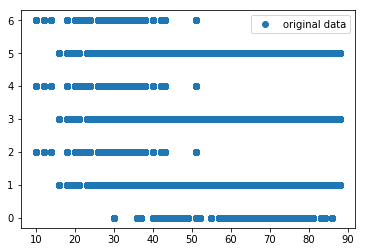

In [95]:
g = plt.plot(crimeCp['Avg_Temp'], crimeCp['description'] ,'o',label='original data')
plt.legend()
plt.show()

In [94]:
print crimeCp["description"].unique()

[6 4 2 3 5 1 0]
